In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tex_fonts = {
    "pgf.texsystem": "pdflatex",
    'pgf.rcfonts': False,
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [3]:
N = M = 8

j = np.arange(M)+1

In [4]:
p_j = lambda q: np.sqrt(2/M) * np.cos(np.pi / M * q * (j-.5))
a_j = lambda phi, phi_0: 1/np.sqrt(M) * np.exp(1j*(phi* j + phi_0))

def fidelity_calc(M, phi):
    f = np.empty((M-1, len(phi)))
    for i, q in enumerate(range(1, M)):
        for k, phi_k in enumerate(phi):
            phi_0 = -(M+1)/2*phi_k
            f[i, k] = abs(sum(p_j(q)*a_j(phi_k, phi_0)))
    return f

In [5]:
size = 1000
div = (size-(N-1))//(N-2)
size = N-1 + div*(N-2)

phi = 2*np.pi/M*np.linspace(0, M, size)

In [6]:
fid = fidelity_calc(M, phi)

In [7]:
y = np.arange(1, M)
x = phi / (2*np.pi/M)

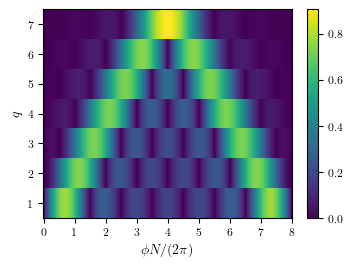

In [11]:
fig, ax = plt.subplots(1, constrained_layout = True)

im = plt.pcolormesh(x, y, fid, rasterized=True)
cbar = plt.colorbar(im)#, location='top')

#cbar.set_label(r'$\left|  f^{(\phi)}_q \right| $',
#               #labelpad = 10.0,
#               #loc = 'left',
#              )
#cbar.set_label(r'$|  f^{(\phi)}_q | $')

'''
cbar.ax.tick_params(#direction='in', 
                    bottom = True, 
                    labelbottom = True,
                    top = False,
                    labeltop = False,
                    )
'''

#plt.ylabel(r'$q \left[\frac{1}{N}\right] $')
plt.ylabel(r'$q$')
#plt.xlabel(r'$\phi\ \left[ \frac{2\pi}{N}\right]$')
plt.xticks(np.arange(M+1))
plt.xlabel(r'$\phi N / (2\pi)$')

colwidth = 3.416666
fig.set_size_inches(w = colwidth, h = .75*colwidth)

fig.savefig(f'output/fidelity_N{N}.pdf', bbox_inches='tight', dpi=300)